In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('airfoil_self_noise.dat',sep="\t",header=None)

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.columns=["Frequency","Angle_of_attack","Chord_length","Free-stream_velocity","Suction_side","pressure_level"]

In [5]:
df.head()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side,pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.isnull().sum()

Frequency               0
Angle_of_attack         0
Chord_length            0
Free-stream_velocity    0
Suction_side            0
pressure_level          0
dtype: int64

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
X

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [9]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: pressure_level, Length: 1503, dtype: float64

In [10]:
### first Do train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.head()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


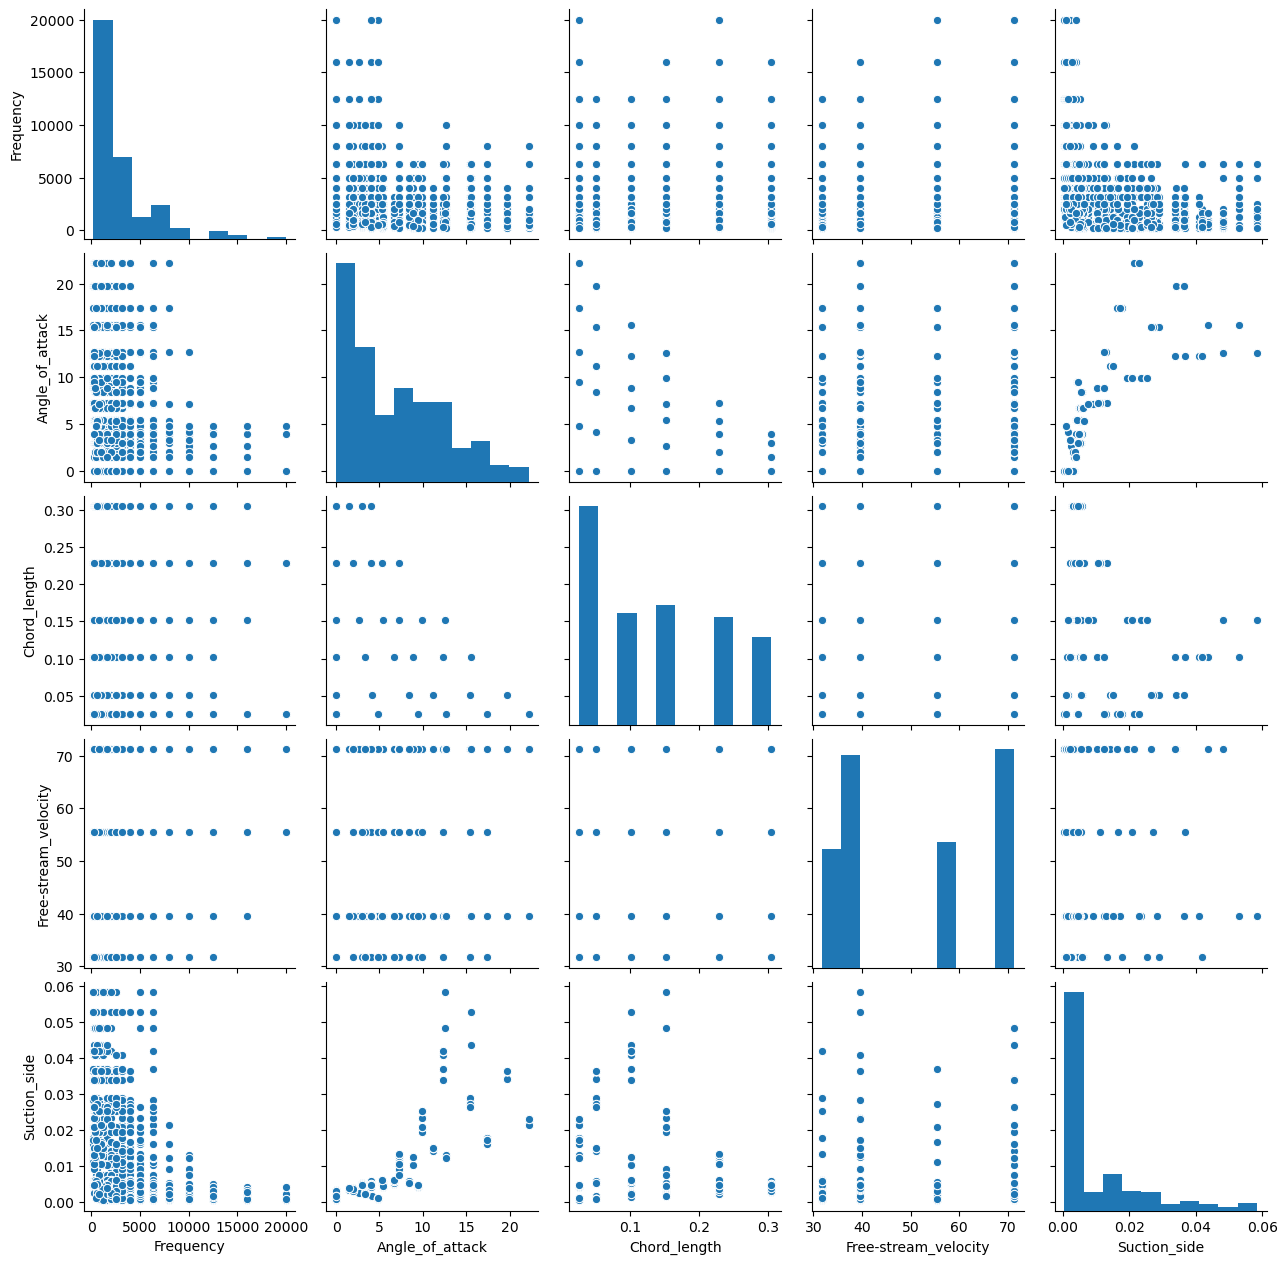

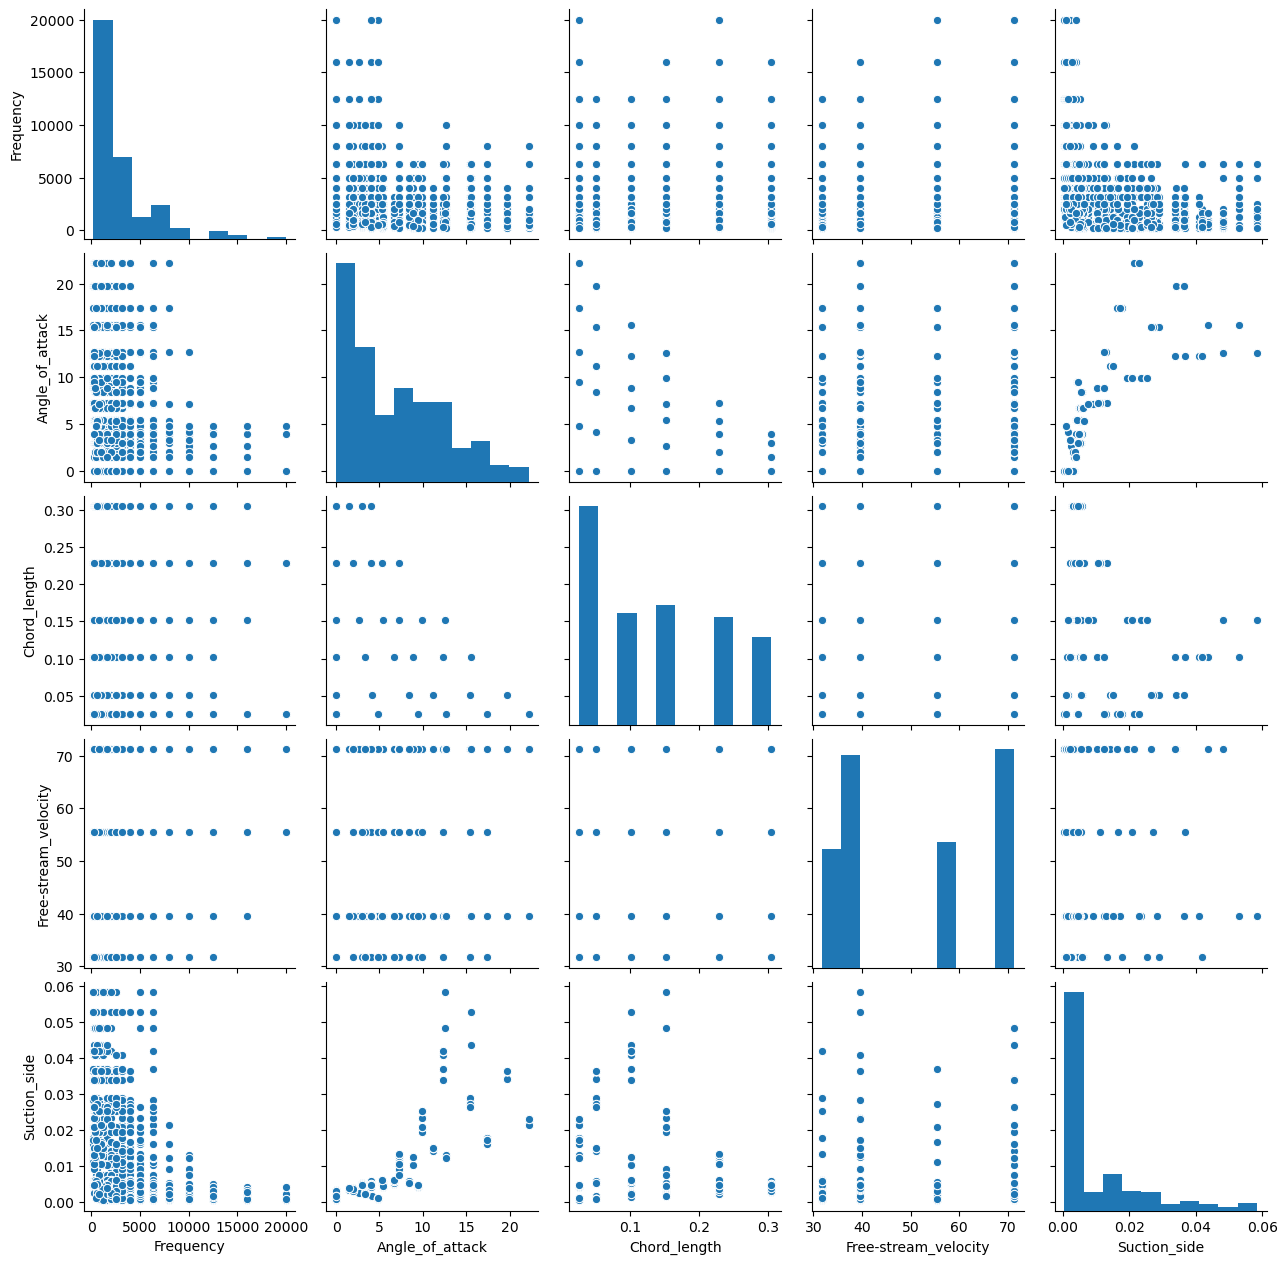

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X_train)
plt.show()

In [14]:
X_train.corr()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle_of_attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord_length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream_velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction_side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


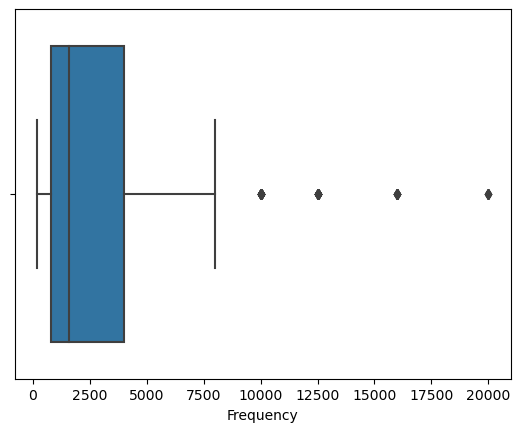

In [15]:
sns.boxplot(X_train['Frequency'])
plt.show()

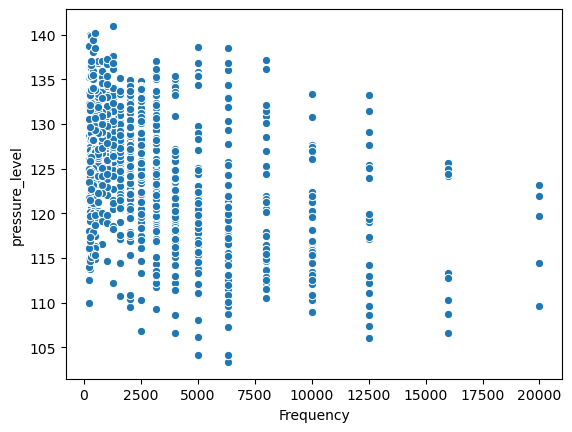

In [16]:
sns.scatterplot(X_train['Frequency'],y)
plt.show()

In [18]:
len(df['pressure_level'].unique())

1456

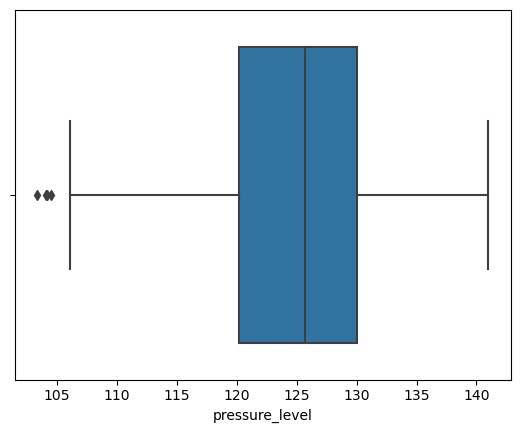

In [20]:
sns.boxplot(df['pressure_level'])
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

In [26]:
pickle_model = pickle.load(open('model.pkl','rb'))
y_pred  = pickle_model.predict(X_test)

In [27]:
y_pred

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37

In [32]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("R-squared value:", r_squared)

R-squared value: 0.5124474986138434


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

22.9546695351341

In [35]:
from sklearn import metrics
Train = 100*metrics.r2_score(y_train,pickle_model.predict(X_train))
Test = 100*metrics.r2_score(y_test,pickle_model.predict(X_test))
print("Training data accuracy: {} %".format(Train))
print("Testing data accuracy: {} %".format(Test))

Training data accuracy: 51.54777137019574 %
Testing data accuracy: 51.24474986138434 %


In [38]:
from sklearn.ensemble import RandomForestRegressor
# Train the random forest model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared:", r_squared)
print("MSE:", mse)

R-squared: 0.9131308726714301
MSE: 4.089922839004077


# Model Selected Random Forest

In [39]:
import pickle
pickle.dump(regressor, open('model1.pkl','wb'))

In [40]:
pickle_model = pickle.load(open('model1.pkl','rb'))
y_pred  = pickle_model.predict(X_test)

In [41]:
y_pred

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37